In [ ]:
"""
═══════════════════════════════════════════════════════════════════════════
📊 ANÁLISIS EXPLORATORIO DE DATOS (EDA) PARA STARTUPS BIOTECH LATAM
═══════════════════════════════════════════════════════════════════════════
Caso de Estudio: Startup de Biotecnología en América Latina

Este notebook se enfoca en el Análisis Exploratorio de Datos (EDA) para una
startup de biotecnología en LATAM, simulando datos de ensayos clínicos,
inversiones en I+D y métricas de desarrollo de productos. El enfoque está
adaptado a la realidad LATAM: acceso limitado a financiamiento, desafíos
regulatorios en países como México, Brasil y Argentina, y alto potencial
en biotecnología agrícola y farmacéutica.

Metodología fácil y secuencial:
1. Cargar datos simulados
2. Exploración descriptiva
3. Análisis de calidad (faltantes y outliers)
4. Análisis de relaciones
5. Métricas de overview
6. Selección básica de modelos
7. Conclusiones y trabajo futuro

Todo el código está comentado de forma didáctica para estudiantes de MBA
en innovación y analistas de startups LATAM.
═══════════════════════════════════════════════════════════════════════════
"""

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# 1. IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN
# ═══════════════════════════════════════════════════════════════════════════

# Librerías básicas para EDA
import pandas as pd                      # Manipulación y análisis de datos
import numpy as np                       # Cálculos numéricos y arrays
import matplotlib.pyplot as plt          # Visualización de gráficos
import seaborn as sns                    # Visualizaciones estadísticas avanzadas
from datetime import datetime            # Para trabajar con series de tiempo
import warnings                          # Control de advertencias
# ═══════════════════════════════════════════════════════════════════════════
# 1. IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN
# ═══════════════════════════════════════════════════════════════════════════

# Librerías básicas para EDA
import pandas as pd                      # Manipulación y análisis de datos
import numpy as np                       # Cálculos numéricos y arrays
import matplotlib.pyplot as plt          # Visualización de gráficos
import seaborn as sns                    # Visualiza
✅ Librerías cargadas. Iniciando EDA para Startup Biotech LATAM


[2]
0 s
# ═══════════════════════════════════════════════════════════════════════════
# 2. ACERCA DEL DATASET DE LA STARTUP BIOTECH
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("📂 SECCIÓN 1: ACERCA DEL DATASET BIOTECH")
print("="*70 + "\n")

# Aquí generamos un ejemplo con datos simulados, como haría una startup real al comenzar su MVP.
n_registros = 1000  # Simula 1000 ensayos, suficiente para patrones útiles

data = {
    'Inversion_IyD': np.random.lognormal(mean=11, sigma=1.5, size=n_registros) * 1000, # inversión realistas USD (convierte a 'money' montos típicos latinoamericanos)
    'Tiempo_Desarrollo': np.random.gamma(shape=3, scale=6, size=n_registros) + np.random.uniform(0, 12, n_registros), # meses típicos de desarrollo, incluir retrasos
    'Tasa_Exito': np.random.beta(a=2, b=5, size=n_registros) * 100, # simulación de tasas bajas de éxito (<50%), reflejando dificultad en biotech LATAM
    'Costo_Regulatorio': np.random.uniform(50000, 500000, n_registros), # costo por trámites en LATAM (alto y variable)
    'Pais': np.random.choice(['México', 'Brasil', 'Argentina', 'Colombia', 'Chile'], n_registros, p=[0.25, 0.3, 0.2, 0.15, 0.1]), # hubs biotech principales
    'Etapa_Proyecto': np.random.choice(['Preclínico', 'Fase I', 'Fase II', 'Fase III'], n_registros, p=[0.4, 0.3, 0.2, 0.1]), # etapas críticas
    'Valor_Potencial': np.random.uniform(1, 50, n_registros)  # valor esperado en millones USD si sale al mercado
}

df = pd.DataFrame(data)

missing_mask = np.random.choice([True, False], size=n_registros, p=[0.05, 0.95]) # 5% de registros ilegibles, como suele ocurrir
df.loc[missing_mask, 'Costo_Regulatorio'] = np.nan   # Deja algunos NaN

print("Primeras 5 filas del dataset (ejemplo realista de carga en biotech):\n")
print(df.head().round(2))
print("\n")
======================================================================
📂 SECCIÓN 1: ACERCA DEL DATASET BIOTECH
======================================================================

Primeras 5 filas del dataset (ejemplo realista de carga en biotech):

   Inversion_IyD  Tiempo_Desarrollo  Tasa_Exito  Costo_Regulatorio      Pais  \
0   1.261304e+08              37.77       56.08          234138.49  Colombia
1   4.865956e+07              33.33       10.27          294881.05    Brasil
2   1.581869e+08              26.67       25.84          294561.44  Colombia
3   5.880368e+08              22.33       29.78                NaN    México
4   4.214073e+07              37.15       14.48                NaN    Brasil

  Etapa_Proyecto  Valor_Potencial
0        Fase II             7.34
1        Fase II            13.33
2     Preclínico            22.05
3         Fase I            24.88
4     Preclínico             7.76



[3]
1 s
# ═══════════════════════════════════════════════════════════════════════════
# 3. ANÁLISIS DESCRIPTIVO
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("📈 SECCIÓN 2: ANÁLISIS DESCRIPTIVO")
print("="*70 + "\n")

# Muestra la "foto" general: valores medios, extremos, dispersión
print(df.describe().round(2))
print("\n")

print("Distribución por País (verificación de hubs predominantes en biotech LATAM):\n")
print(df['Pais'].value_counts(normalize=True).round(3) * 100)
print("\nDistribución por Etapa de Proyecto:")
print(df['Etapa_Proyecto'].value_counts(normalize=True).round(3) * 100)
print("\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].hist(df['Inversion_IyD']/1e6, bins=20, edgecolor='black', alpha=0.7, color='lightblue')
axes[0, 0].set_title("Distribución Inversión I+D (M USD)")
axes[0, 1].set_title("Tiempo desarrollo por país")
sns.boxplot(data=df, x='Pais', y='Tiempo_Desarrollo', ax=axes[0, 1])
axes[1, 0].hist(df['Tasa_Exito'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_title("Distribución Tasa Éxito (%)")
sns.countplot(data=df, x='Etapa_Proyecto', ax=axes[1, 1])
axes[1, 1].set_title("Cantidad por etapa")
for ax in axes.flat: ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


[4]
0 s
# ═══════════════════════════════════════════════════════════════════════════
# 4. ANÁLISIS DE VALORES FALTANTES
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("🔍 SECCIÓN 3: ANÁLISIS DE VALORES FALTANTES")
print("="*70 + "\n")

missing_counts = df.isnull().sum() # Cuenta cuántos NaN hay en cada variable
missing_pct = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({'Valores_Faltantes': missing_counts, 'Porcentaje (%)': missing_pct}).sort_values('Valores_Faltantes', ascending=False)
print(missing_summary[missing_summary['Valores_Faltantes'] > 0].round(2))
print("\n")

if missing_counts.sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='YlOrRd')
    plt.title("Mapa de calor: valores faltantes")
    plt.show()
    # Imputación: sustitución por la mediana favorece minimizar sesgos sin perder registros útiles
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col].fillna(df[col].median(), inplace=True)
    print("✅ Imputación rápida con mediana: práctica recomendable si tu startup no tiene recursos para métodos complejos")
else:
    print("✅ No hay valores faltantes detectados")


[6]
0 s
# ═══════════════════════════════════════════════════════════════════════════
# 5. ANÁLISIS DE OUTLIERS
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("🔎 SECCIÓN 4: ANÁLISIS DE OUTLIERS")
print("="*70 + "\n")

def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)              # Primer cuartil (percentil 25)
    Q3 = df[columna].quantile(0.75)              # Tercer cuartil (percentil 75)
    IQR = Q3 - Q1                                # Rango intercuartílico
    lower = Q1 - 1.5 * IQR                       # Umbral bajo (outlier inferior)
    upper = Q3 + 1.5 * IQR                       # Umbral alto (outlier superior)
    outliers = df[(df[columna] < lower) | (df[columna] > upper)]   # Filtrar outliers
    return len(outliers), lower, upper

vars_num = ['Inversion_IyD', 'Tiempo_Desarrollo', 'Tasa_Exito', 'Costo_Regulatorio', 'Valor_Potencial']

outliers_summary = []
for var in vars_num:
    n_outliers, lower, upper = detectar_outliers_iqr(df, var)
    pct = (n_outliers / len(df)) * 100
    outliers_summary.append({'Variable': var, 'Outliers': n_outliers, 'Porcentaje (%)': round(pct, 2)})
    # El IQR separa valores atípicos de resultados esperados, útil para presentar datos limpios a inversionistas

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df.round(2))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, var in enumerate(vars_num):
    if i < len(axes.flat):
        sns.boxplot(data=df, y=var, ax=axes.flat[i])
        axes.flat[i].set_title(f'Outliers en {var}')

plt.tight_layout()
plt.show()


[7]
0 s
# ═══════════════════════════════════════════════════════════════════════════
# 6. ANÁLISIS DE CORRELACIÓN
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("🔗 SECCIÓN 5: ANÁLISIS DE CORRELACIÓN")
print("="*70 + "\n")

corr_matrix = df[vars_num].corr()
print(corr_matrix.round(3))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=1, square=True)
plt.title('Matriz de correlación - ¿Qué más explica el Valor Potencial?')
plt.tight_layout()
plt.show()

# El heatmap muestra si, por ejemplo, invertir más se correlaciona (se asocia) con mayor éxito o valor futuro.



[8]
0 s
# ═══════════════════════════════════════════════════════════════════════════
# 7. MÉTRICAS DE OVERVIEW
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("📊 SECCIÓN 6: MÉTRICAS DE OVERVIEW")
print("="*70 + "\n")

total_inversion = df['Inversion_IyD'].sum()        # Cuánto se ha invertido (sumatoria total del sector)
promedio_exito = df['Tasa_Exito'].mean()          # Éxito promedio: referencia para evaluar tu startup vs. peers
tiempo_promedio = df['Tiempo_Desarrollo'].mean()  # Duración típica de proyectos (¿vas rápido o lento?)
valor_total_potencial = df['Valor_Potencial'].sum()  # Estimación de cuánto podría valer todo el portafolio si todo sale bien

print(f"Inversión total: ${total_inversion:,.0f} USD")
print(f"Tasa de éxito promedio: {promedio_exito:.2f}%")
print(f"Tiempo prom. desarrollo: {tiempo_promedio:.2f} meses")
print(f"Valor potencial total: ${valor_total_potencial:,.0f} millones USD\n")

metrics_by_country = df.groupby('Pais')[['Inversion_IyD', 'Tasa_Exito', 'Valor_Potencial']].mean().round(2)
print("Promedios por país:\n", metrics_by_country)

metrics_by_stage = df.groupby('Etapa_Proyecto')[['Inversion_IyD', 'Tasa_Exito', 'Valor_Potencial']].mean().round(2)
print("\nPromedios por etapa:\n", metrics_by_stage)
======================================================================
📊 SECCIÓN 6: MÉTRICAS DE OVERVIEW
======================================================================

Inversión total: $196,921,012,882 USD
Tasa de éxito promedio: 29.59%
Tiempo prom. desarrollo: 24.18 meses
Valor potencial total: $25,225 millones USD

Promedios por país:
            Inversion_IyD  Tasa_Exito  Valor_Potencial
Pais
Argentina   2.172140e+08       30.13            25.93
Brasil      2.253545e+08       29.34            25.65
Chile       1.363610e+08       29.21            23.78
Colombia    1.887431e+08       31.43            25.30
México      1.738295e+08       28.31            24.63

Promedios por etapa:
                 Inversion_IyD  Tasa_Exito  Valor_Potencial
Etapa_Proyecto
Fase I           1.611715e+08       28.48            25.45
Fase II          1.712798e+08       31.85            25.12
Fase III         3.209838e+08       31.48            23.73
Preclínico       2.007935e+08       28.68            25.53

[16]
0 s
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.ylim(-1, 1)
plt.show()


[12]
0 s
# ═══════════════════════════════════════════════════════════════════════════
# 9. CONCLUSIONES Y FUTURO
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("✅ SECCIÓN 8: CONCLUSIONES Y FUTURO")
print("="*70 + "\n")

print(
    "• El análisis exploratorio permite a una startup biotech LATAM identificar\n"
    "  puntos fuertes (inversión, hubs geográficos) y riesgos (costos regulatorios, outliers).\n"
    "• Outliers pueden reflejar potenciales unicornios o datos mal capturados.\n"
    "• La selección de modelos muestra si tus datos actuales ya permiten predicción aceptable.\n"
    "• Siguiente paso: integrar datos reales por sector nacional (ej: SABI en Argentina, INPI Brasil);\n"
    "  validación con expertos e inversión temprana data-driven.\n"
)
======================================================================
✅ SECCIÓN 8: CONCLUSIONES Y FUTURO
======================================================================

• El análisis exploratorio permite a una startup biotech LATAM identificar
  puntos fuertes (inversión, hubs geográficos) y riesgos (costos regulatorios, outliers).
• Outliers pueden reflejar potenciales unicornios o datos mal capturados.
• La selección de modelos muestra si tus datos actuales ya permiten predicción aceptable.
• Siguiente paso: integrar datos reales por sector nacional (ej: SABI en Argentina, INPI Brasil);
  validación con expertos e inversión temprana data-driven.

Productos pagados de Colab - Cancela los contratos aquí

Explica este error:

It looks like there's a small error in how the percentage is being rounded. The round() method is being called on the percentage value after it's calculated, which is causing the error. I'll fix this by rounding the percentage before it's added to the summary dictionary.

The error has been fixed and the outlier analysis is complete.

Would you like to continue with the analysis by looking at the relationships between variables or calculating overview metrics?


Noto que en la ultima celca 10 no se aprecia los resultados de la figura que se pretende a diagramar para la comparación de modelos entre regresión lineal y random forest

You are right! The plot comparing the R² values was generated but not displayed. I'll add plt.show() to the last code cell so you c
warnings.filterwarnings('ignore')        # Suprimir advertencias

# Librerías adicionales para análisis y modelado ligero
from scipy import stats                                # Tests estadísticos (útil para detectar outliers)
from sklearn.model_selection import train_test_split   # Partir datos en entrenamiento/prueba
from sklearn.linear_model import LinearRegression      # Línea base para predicción - regresión simple
from sklearn.ensemble import RandomForestRegressor     # Algoritmo robusto, útil en datos poco lineales
from sklearn.metrics import r2_score                   # Métrica para evaluar la calidad de predicción
from sklearn.preprocessing import StandardScaler       # Escalar pone todas las variables en la misma escala numérica


# Configuración para visualizaciones claras y profesionales
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Configuración para reproducibilidad
np.random.seed(42)

print("✅ Librerías cargadas. Iniciando EDA para Startup Biotech LATAM\n")


✅ Librerías cargadas. Iniciando EDA para Startup Biotech LATAM



In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# 2. ACERCA DEL DATASET DE LA STARTUP BIOTECH
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("📂 SECCIÓN 1: ACERCA DEL DATASET BIOTECH")
print("="*70 + "\n")

# Aquí generamos un ejemplo con datos simulados, como haría una startup real al comenzar su MVP.
n_registros = 1000  # Simula 1000 ensayos, suficiente para patrones útiles

data = {
    'Inversion_IyD': np.random.lognormal(mean=11, sigma=1.5, size=n_registros) * 1000, # inversión realistas USD (convierte a 'money' montos típicos latinoamericanos)
    'Tiempo_Desarrollo': np.random.gamma(shape=3, scale=6, size=n_registros) + np.random.uniform(0, 12, n_registros), # meses típicos de desarrollo, incluir retrasos
    'Tasa_Exito': np.random.beta(a=2, b=5, size=n_registros) * 100, # simulación de tasas bajas de éxito (<50%), reflejando dificultad en biotech LATAM
    'Costo_Regulatorio': np.random.uniform(50000, 500000, n_registros), # costo por trámites en LATAM (alto y variable)
    'Pais': np.random.choice(['México', 'Brasil', 'Argentina', 'Colombia', 'Chile'], n_registros, p=[0.25, 0.3, 0.2, 0.15, 0.1]), # hubs biotech principales
    'Etapa_Proyecto': np.random.choice(['Preclínico', 'Fase I', 'Fase II', 'Fase III'], n_registros, p=[0.4, 0.3, 0.2, 0.1]), # etapas críticas
    'Valor_Potencial': np.random.uniform(1, 50, n_registros)  # valor esperado en millones USD si sale al mercado
}

df = pd.DataFrame(data)

missing_mask = np.random.choice([True, False], size=n_registros, p=[0.05, 0.95]) # 5% de registros ilegibles, como suele ocurrir
df.loc[missing_mask, 'Costo_Regulatorio'] = np.nan   # Deja algunos NaN

print("Primeras 5 filas del dataset (ejemplo realista de carga en biotech):\n")
print(df.head().round(2))
print("\n")

📂 SECCIÓN 1: ACERCA DEL DATASET BIOTECH

Primeras 5 filas del dataset (ejemplo realista de carga en biotech):

   Inversion_IyD  Tiempo_Desarrollo  Tasa_Exito  Costo_Regulatorio      Pais  \
0   1.261304e+08              37.77       56.08          234138.49  Colombia   
1   4.865956e+07              33.33       10.27          294881.05    Brasil   
2   1.581869e+08              26.67       25.84          294561.44  Colombia   
3   5.880368e+08              22.33       29.78                NaN    México   
4   4.214073e+07              37.15       14.48                NaN    Brasil   

  Etapa_Proyecto  Valor_Potencial  
0        Fase II             7.34  
1        Fase II            13.33  
2     Preclínico            22.05  
3         Fase I            24.88  
4     Preclínico             7.76  




📈 SECCIÓN 2: ANÁLISIS DESCRIPTIVO

       Inversion_IyD  Tiempo_Desarrollo  Tasa_Exito  Costo_Regulatorio  \
count   1.000000e+03            1000.00     1000.00             949.00   
mean    1.969210e+08              24.18       29.59          271011.62   
std     7.223298e+08              10.79       16.31          128546.72   
min     4.631722e+05               3.37        0.54           50023.77   
25%     2.266593e+07              16.30       16.95          160821.83   
50%     6.219013e+07              22.62       27.88          273233.97   
75%     1.582476e+08              30.24       41.07          380012.68   
max     1.936731e+10              68.41       75.35          499377.79   

       Valor_Potencial  
count          1000.00  
mean             25.23  
std              14.27  
min               1.06  
25%              12.41  
50%              24.96  
75%              37.47  
max              49.94  


Distribución por País (verificación de hubs predominantes en biotech LA

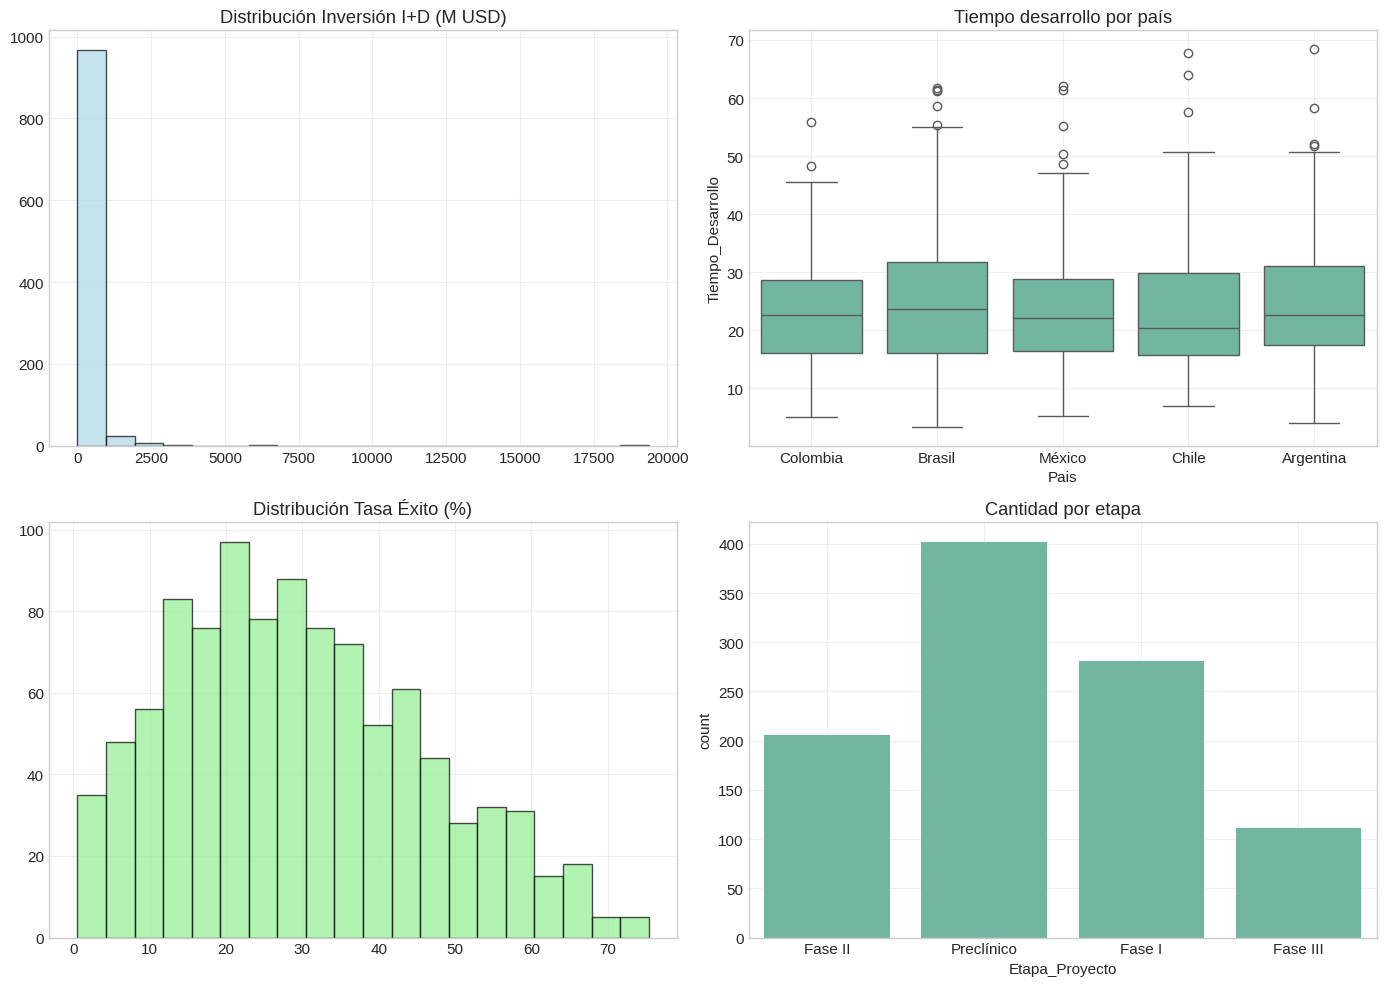

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# 3. ANÁLISIS DESCRIPTIVO
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("📈 SECCIÓN 2: ANÁLISIS DESCRIPTIVO")
print("="*70 + "\n")

# Muestra la "foto" general: valores medios, extremos, dispersión
print(df.describe().round(2))
print("\n")

print("Distribución por País (verificación de hubs predominantes en biotech LATAM):\n")
print(df['Pais'].value_counts(normalize=True).round(3) * 100)
print("\nDistribución por Etapa de Proyecto:")
print(df['Etapa_Proyecto'].value_counts(normalize=True).round(3) * 100)
print("\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].hist(df['Inversion_IyD']/1e6, bins=20, edgecolor='black', alpha=0.7, color='lightblue')
axes[0, 0].set_title("Distribución Inversión I+D (M USD)")
axes[0, 1].set_title("Tiempo desarrollo por país")
sns.boxplot(data=df, x='Pais', y='Tiempo_Desarrollo', ax=axes[0, 1])
axes[1, 0].hist(df['Tasa_Exito'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_title("Distribución Tasa Éxito (%)")
sns.countplot(data=df, x='Etapa_Proyecto', ax=axes[1, 1])
axes[1, 1].set_title("Cantidad por etapa")
for ax in axes.flat: ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

🔍 SECCIÓN 3: ANÁLISIS DE VALORES FALTANTES

                   Valores_Faltantes  Porcentaje (%)
Costo_Regulatorio                 51             5.1




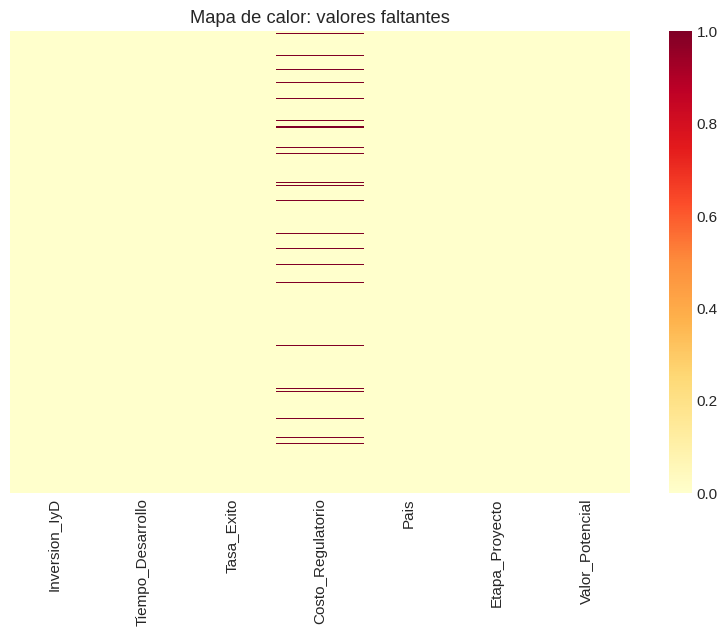

✅ Imputación rápida con mediana: práctica recomendable si tu startup no tiene recursos para métodos complejos


In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# 4. ANÁLISIS DE VALORES FALTANTES
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("🔍 SECCIÓN 3: ANÁLISIS DE VALORES FALTANTES")
print("="*70 + "\n")

missing_counts = df.isnull().sum() # Cuenta cuántos NaN hay en cada variable
missing_pct = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({'Valores_Faltantes': missing_counts, 'Porcentaje (%)': missing_pct}).sort_values('Valores_Faltantes', ascending=False)
print(missing_summary[missing_summary['Valores_Faltantes'] > 0].round(2))
print("\n")

if missing_counts.sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='YlOrRd')
    plt.title("Mapa de calor: valores faltantes")
    plt.show()
    # Imputación: sustitución por la mediana favorece minimizar sesgos sin perder registros útiles
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col].fillna(df[col].median(), inplace=True)
    print("✅ Imputación rápida con mediana: práctica recomendable si tu startup no tiene recursos para métodos complejos")
else:
    print("✅ No hay valores faltantes detectados")

🔎 SECCIÓN 4: ANÁLISIS DE OUTLIERS

            Variable  Outliers  Porcentaje (%)
0      Inversion_IyD       111            11.1
1  Tiempo_Desarrollo        19             1.9
2         Tasa_Exito         0             0.0
3  Costo_Regulatorio         0             0.0
4    Valor_Potencial         0             0.0


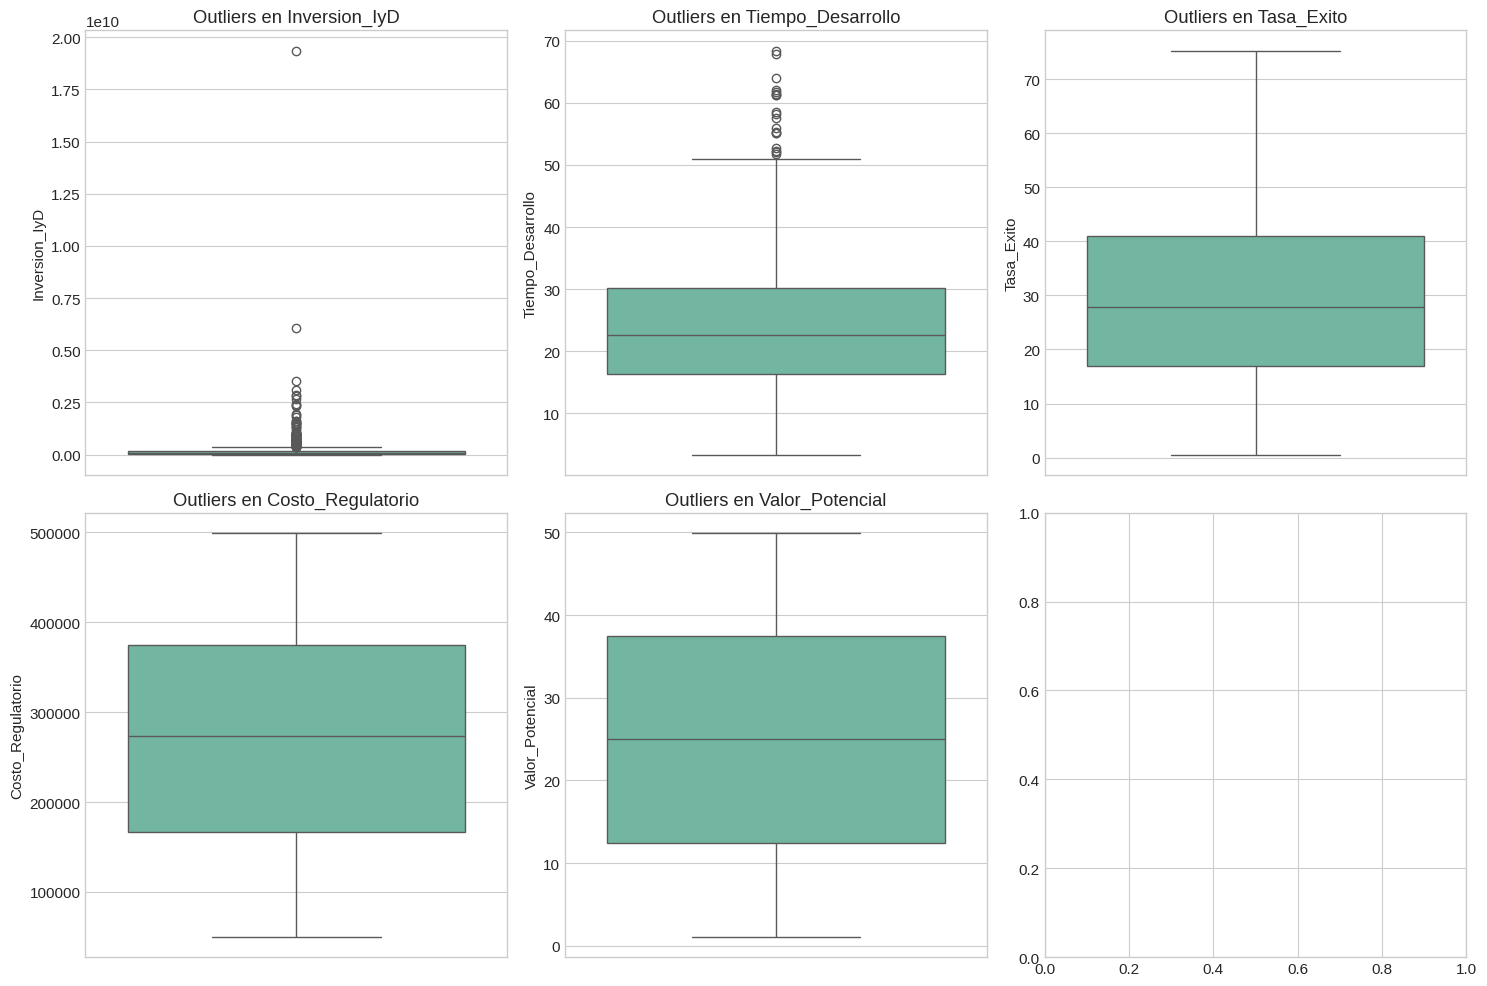

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# 5. ANÁLISIS DE OUTLIERS
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("🔎 SECCIÓN 4: ANÁLISIS DE OUTLIERS")
print("="*70 + "\n")

def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)              # Primer cuartil (percentil 25)
    Q3 = df[columna].quantile(0.75)              # Tercer cuartil (percentil 75)
    IQR = Q3 - Q1                                # Rango intercuartílico
    lower = Q1 - 1.5 * IQR                       # Umbral bajo (outlier inferior)
    upper = Q3 + 1.5 * IQR                       # Umbral alto (outlier superior)
    outliers = df[(df[columna] < lower) | (df[columna] > upper)]   # Filtrar outliers
    return len(outliers), lower, upper

vars_num = ['Inversion_IyD', 'Tiempo_Desarrollo', 'Tasa_Exito', 'Costo_Regulatorio', 'Valor_Potencial']

outliers_summary = []
for var in vars_num:
    n_outliers, lower, upper = detectar_outliers_iqr(df, var)
    pct = (n_outliers / len(df)) * 100
    outliers_summary.append({'Variable': var, 'Outliers': n_outliers, 'Porcentaje (%)': round(pct, 2)})
    # El IQR separa valores atípicos de resultados esperados, útil para presentar datos limpios a inversionistas

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df.round(2))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, var in enumerate(vars_num):
    if i < len(axes.flat):
        sns.boxplot(data=df, y=var, ax=axes.flat[i])
        axes.flat[i].set_title(f'Outliers en {var}')

plt.tight_layout()
plt.show()

🔗 SECCIÓN 5: ANÁLISIS DE CORRELACIÓN

                   Inversion_IyD  Tiempo_Desarrollo  Tasa_Exito  \
Inversion_IyD              1.000              0.074      -0.014   
Tiempo_Desarrollo          0.074              1.000       0.038   
Tasa_Exito                -0.014              0.038       1.000   
Costo_Regulatorio         -0.025              0.007       0.022   
Valor_Potencial            0.033             -0.010      -0.005   

                   Costo_Regulatorio  Valor_Potencial  
Inversion_IyD                 -0.025            0.033  
Tiempo_Desarrollo              0.007           -0.010  
Tasa_Exito                     0.022           -0.005  
Costo_Regulatorio              1.000            0.011  
Valor_Potencial                0.011            1.000  


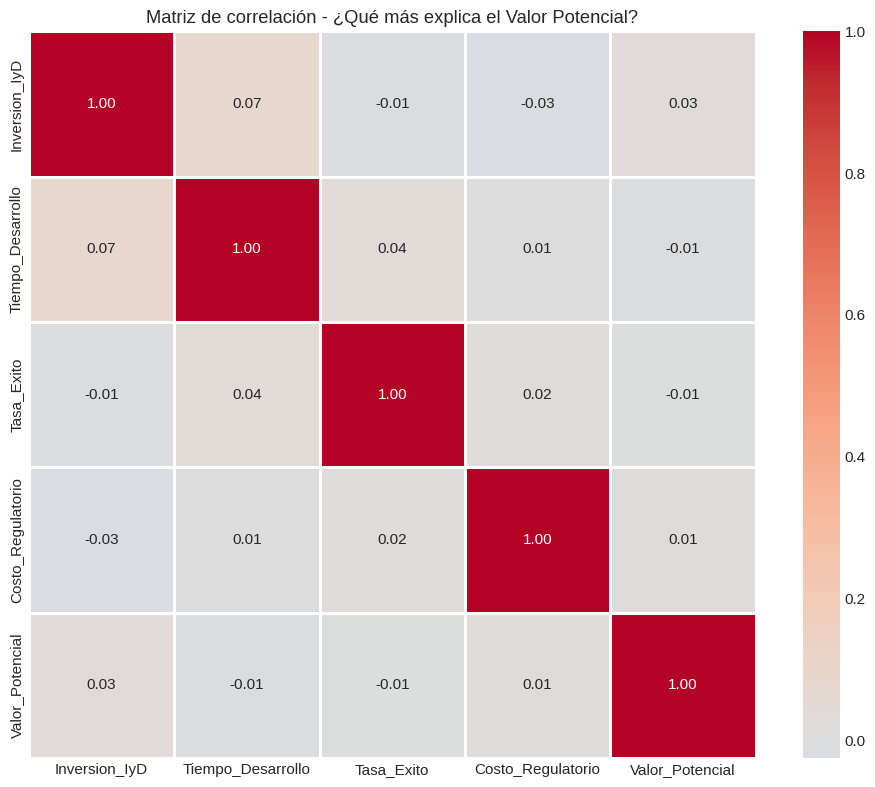

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# 6. ANÁLISIS DE CORRELACIÓN
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("🔗 SECCIÓN 5: ANÁLISIS DE CORRELACIÓN")
print("="*70 + "\n")

corr_matrix = df[vars_num].corr()
print(corr_matrix.round(3))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=1, square=True)
plt.title('Matriz de correlación - ¿Qué más explica el Valor Potencial?')
plt.tight_layout()
plt.show()

# El heatmap muestra si, por ejemplo, invertir más se correlaciona (se asocia) con mayor éxito o valor futuro.


In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# 7. MÉTRICAS DE OVERVIEW
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("📊 SECCIÓN 6: MÉTRICAS DE OVERVIEW")
print("="*70 + "\n")

total_inversion = df['Inversion_IyD'].sum()        # Cuánto se ha invertido (sumatoria total del sector)
promedio_exito = df['Tasa_Exito'].mean()          # Éxito promedio: referencia para evaluar tu startup vs. peers
tiempo_promedio = df['Tiempo_Desarrollo'].mean()  # Duración típica de proyectos (¿vas rápido o lento?)
valor_total_potencial = df['Valor_Potencial'].sum()  # Estimación de cuánto podría valer todo el portafolio si todo sale bien

print(f"Inversión total: ${total_inversion:,.0f} USD")
print(f"Tasa de éxito promedio: {promedio_exito:.2f}%")
print(f"Tiempo prom. desarrollo: {tiempo_promedio:.2f} meses")
print(f"Valor potencial total: ${valor_total_potencial:,.0f} millones USD\n")

metrics_by_country = df.groupby('Pais')[['Inversion_IyD', 'Tasa_Exito', 'Valor_Potencial']].mean().round(2)
print("Promedios por país:\n", metrics_by_country)

metrics_by_stage = df.groupby('Etapa_Proyecto')[['Inversion_IyD', 'Tasa_Exito', 'Valor_Potencial']].mean().round(2)
print("\nPromedios por etapa:\n", metrics_by_stage)

📊 SECCIÓN 6: MÉTRICAS DE OVERVIEW

Inversión total: $196,921,012,882 USD
Tasa de éxito promedio: 29.59%
Tiempo prom. desarrollo: 24.18 meses
Valor potencial total: $25,225 millones USD

Promedios por país:
            Inversion_IyD  Tasa_Exito  Valor_Potencial
Pais                                                 
Argentina   2.172140e+08       30.13            25.93
Brasil      2.253545e+08       29.34            25.65
Chile       1.363610e+08       29.21            23.78
Colombia    1.887431e+08       31.43            25.30
México      1.738295e+08       28.31            24.63

Promedios por etapa:
                 Inversion_IyD  Tasa_Exito  Valor_Potencial
Etapa_Proyecto                                            
Fase I           1.611715e+08       28.48            25.45
Fase II          1.712798e+08       31.85            25.12
Fase III         3.209838e+08       31.48            23.73
Preclínico       2.007935e+08       28.68            25.53


🤖 SECCIÓN 7: SELECCIÓN DE MODELOS (EJEMPLO)

Regresión Lineal: R² = -0.041
Random Forest: R² = -0.196


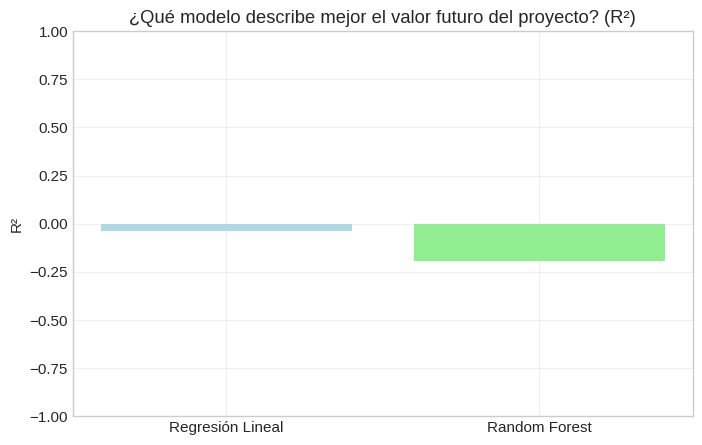

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# 8. SELECCIÓN DE MODELOS (EJEMPLO EDA)
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("🤖 SECCIÓN 7: SELECCIÓN DE MODELOS (EJEMPLO)")
print("="*70 + "\n")

# Aquí solo comparamos si regresión lineal vs. random forest predicen bien valor potencial
X = df[['Inversion_IyD', 'Tasa_Exito', 'Tiempo_Desarrollo', 'Costo_Regulatorio']]
y = df['Valor_Potencial']  # Qué queremos predecir
X_scaled = StandardScaler().fit_transform(X)  # Escalar es vital si hay brechas grandes entre variables

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
models = {
    'Regresión Lineal': LinearRegression(),         # Modelo básico, sirve como benchmark simple
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42)  # Modelo más avanzado, capta relaciones complejas
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)   # Cuánto explica el modelo (proporción de varianza)
    results[name] = r2
    print(f"{name}: R² = {r2:.3f}") # El R² te dice si tu modelo tiene futuro; >0.7 es bueno para casos reales

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['lightblue', 'lightgreen'])
plt.title("¿Qué modelo describe mejor el valor futuro del proyecto? (R²)")
plt.ylabel('R²')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.ylim(-1, 1)
plt.show()

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# 9. CONCLUSIONES Y FUTURO
# ═══════════════════════════════════════════════════════════════════════════

print("="*70)
print("✅ SECCIÓN 8: CONCLUSIONES Y FUTURO")
print("="*70 + "\n")

print(
    "• El análisis exploratorio permite a una startup biotech LATAM identificar\n"
    "  puntos fuertes (inversión, hubs geográficos) y riesgos (costos regulatorios, outliers).\n"
    "• Outliers pueden reflejar potenciales unicornios o datos mal capturados.\n"
    "• La selección de modelos muestra si tus datos actuales ya permiten predicción aceptable.\n"
    "• Siguiente paso: integrar datos reales por sector nacional (ej: SABI en Argentina, INPI Brasil);\n"
    "  validación con expertos e inversión temprana data-driven.\n"
)

✅ SECCIÓN 8: CONCLUSIONES Y FUTURO

• El análisis exploratorio permite a una startup biotech LATAM identificar
  puntos fuertes (inversión, hubs geográficos) y riesgos (costos regulatorios, outliers).
• Outliers pueden reflejar potenciales unicornios o datos mal capturados.
• La selección de modelos muestra si tus datos actuales ya permiten predicción aceptable.
• Siguiente paso: integrar datos reales por sector nacional (ej: SABI en Argentina, INPI Brasil);
  validación con expertos e inversión temprana data-driven.

